In [1]:
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style>') 

In [2]:
import random
import numpy as np
random.seed(10)
np.random.seed(100)

# >X57128.1_136-761-context-only
# cuaacuuucgcaagcgagucucgcgacaauugcagaagccuagugaguugcggucguguuuguugcuuaaaccagcaguccgucuacaacuccucggcuacaucauaacuugccuuugugcucuccccugcgagcgccgcucuccgccgcuugcacggcgccgcugcuuaaucgucgaaaauccugcaacagcugccaacaaugacucaagucuuauaggccacugccuggugcuucccguuucuugaaagauaugaaggcacccgggagaagccgggaagcaagcgucagugguggccgcugccuccacggcaaugcgucaucacucucacugcugccaggcagggcugcgacaaugccuggcgaaauacaucagcgcgcgguaagcgaaagcggcucaucgaaguacuccgcgacggggggacaacaguggccgagaaugccacuccacucccgucaccccagaagcgcccucggucaguuccuguccauuuagcaaagacaacaagacagaaacaauuuguuuccacuacacuuauuuccuccuaaacgguaggcucauuaaguuaaauugguaguuacaucauguguuaacgugac
# trna = "ggcggcauggccaagcgguaaggcaggggacugcaaauccuuuauccccaguucaaaucugggugccgccu";
# trna2 >X70810.2_30807-30878
# GCCUUUUUAGCUCAGUGGUAGAGCAUUGUAUUUGUAAUGCGGUGGUCGUCGGUUCGAAUCCGACAAAAGGCU
# (((((((((.(.....).))((.(((((((((...))))))))).))(((((.......)))))))))))).
# minimum free energy = -24.30 kcal/mol


trna="GCCUUUUUAGCUCAGUGGUAGAGCAUUGUAUUUGUAAUGCGGUGGUCGUCGGUUCGAAUCCGACAAAAGGCU"
context_trna = "uaugauauuuuuauaguguuuuauucauggaucaauucuauuuuuuauuagcacgugguuuuauuuuguuaaauuguaaa\
uccguauuauuuauaaauugauccuagcucaaaguucaguauuuuuaaauuuuuuuaguuuuaaauaaauauuuuguauaaaaaugugugauuauuu\
aaaagauuucuuccauuucaugacuuuuaauuuuaaaaaaaaauuucaaguauguggccauguauccguauuuggagacaagaagcaagaaaagguu\
uucuuuauaaaaaaguuuagguguuu\
uuauuuuagguaacuuuuuaagcguguuucaccggugcauucaguuuuuuuaguaaugcauaugucauugcaauuuuagcauuauguaaucuuaaa\
agcuuuugucauauuucucaacugcuaugauauauugauaggaguccuucucaauggaugcgggagaauaaauauauuguucacgguagucuaaggc\
ucauugcccccuuuuuaaagucuuagcuuucaucaugcccaggauaaaauaaucaguguugcaauaguucaaauaagcuuaauucaaaguuuauuuuagaggaucgg"


In [3]:
%load_ext autoreload
%autoreload 2
from local_dotplot_lib import *


import RNA
from altschulEriksonDinuclShuffle import dinuclShuffle

import pandas as pd
from matplotlib import pyplot as plt
# import mpld3 
# from mpld3 import plugins
# mpld3.enable_notebook()

def plot_scatter(x, y, xlab, ylab, labels, fig, ax, color=None, scale='linear'):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    y = [yy + 1e-5 for yy in y ]
    if color is not None:
        cc = color
    else:
        cc = 'skyblue'
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_yscale(scale)
    #ax.set_xlim([1,])
    if scale =='log':
       ax.set_yscale(scale)
       ax.set_ylim([1e-6, 20])
    if scale =='linear':
       ax.set_yscale(scale)
       ax.set_ylim([-0.05,1.3])
    
    points = ax.scatter(x, y, s=10, linewidth='0', c=cc)

    # Connect d3 points with mouse over lables
    # tooltip = plugins.PointLabelTooltip(points, labels)
    # plugins.connect(fig, tooltip)

def plot_scatter_df(mydf, pdfname='defaultname', scale='linear', what='both', plot_mfe=False, plot_quake=False):
    
    if what == 'both':
        fig = plt.figure(figsize=(10, 10))
        subplot_num = 210
    else:
        fig = plt.figure(figsize=(10, 5))
        subplot_num = 110
    
    mpld3.plugins.clear(fig)  # clear all plugins from the figure    
    suffix = ""
    if plot_mfe:
        suffix += "-mfe"
    else:
        suffix += "-prob"
    
    if plot_quake:
        suffix += "-quake"
    import matplotlib.patches as mpatches

    # if scale == 'linear':
    #    ax.set_ylim([min(-20,  min(mydf[nameY])),max(30, max(mydf[nameY]))])
    # import math
    #     yrange = round(mydf[nameY].median()/10) * 10
    #     print "{} median: {}".format(nameY, mydf[nameY].median())
    #     ax.set_ylim([yrange-100, yrange+100])#[mydf[nameY].median() - 10 ,mydf[nameY].median() + 10])
    color_pallete = ['b', "#e41a1c","#386cb0","#1b9e77","#984ea3", "#ff7f00","#ffff33","#a65628","#f781bf"]
    if plot_quake:
        pdfname += "-Quake"
    else:
        pdfname += "-Turner"
    
    if plot_quake:
        extend_color = color_pallete[0]    
    else:
        extend_color = color_pallete[0]
    if what == 'both' or what=='split':
        subplot_num+=1
        ax = fig.add_subplot(subplot_num)
        plot_scatter(mydf['context-length'], mydf['split'+suffix], 'context-length', (suffix.split("-"))[1], 
                 [str(v) for v in list(mydf.index.values)], fig, ax, 
                 color='y', scale=scale)
        patch = mpatches.Patch(label='Split-' + pdfname)
        ax.legend(handles=[patch], loc='best', shadow=False)

    if what == 'both' or what=='extend':
        subplot_num+=1
        ax = fig.add_subplot(subplot_num)
        plot_scatter(mydf['context-length'], mydf['extend'+suffix], 'context-length', (suffix.split("-"))[1],
                     [str(v) for v in list(mydf.index.values)], fig, ax, 
                     color=extend_color, scale=scale)
        patch = mpatches.Patch(label='Extend-' + pdfname)
        ax.legend(handles=[patch], loc='best', shadow=False)


#     fig.suptitle(pdfname+"-"+what, y =0.96)
    fig.savefig (pdfname+"-"+what+".svg", dpi=600) #, bbox_inches='tight')
    print "Plot saved to: ", pdfname+"-"+what+".svg"

def my_eval(rna_seq, context, l_pos, r_pos, rna_split_pos, step=10, quake_opts=[False], use_pywrapper=False, max_context_size=300, repeats=1):
    context = context.upper()
    cont_lengths, inner_probs, outer_probs, inner_mfes, outer_mfes = [] , [], [], [], []
    inner_probs_quake, outer_probs_quake, inner_mfes_quake, outer_mfes_quake = [] , [], [], []
    assert (not  use_pywrapper) # Availability of RNAlib wrapper with non-Turner parameter not checked
    for context_len in range(0,max_context_size,step):
        for irepeat in range(repeats):
            # select a range of the context, each time reshuffle to not stick into a (rare) sub-minimal case
            selection = dinuclShuffle(context)[0:context_len]
            # Insert the rna inbetween selection, insert position is from a normal distribution with mean 
            # be the center of the selected context
            center_pos = len(selection)/2
            insert_pos = max(0, int(np.random.normal(center_pos, 1+center_pos*0.1 )))
            print '.',
            # print "(", context_len, center_pos, insert_pos, ")", 
            full_seq_inner = selection[:insert_pos] +  rna_seq + selection[insert_pos:]
            full_seq_outer = rna_seq[:rna_split_pos] +  selection + rna_seq[rna_split_pos:]
            if use_pywrapper:
                structure = ""
                RNA.pf_fold(full_seq_inner, structure)
                inner_prob = RNA.get_pr(insert_pos+l_pos+1,insert_pos+r_pos+1)

                RNA.free_pf_arrays()

                RNA.pf_fold(full_seq_outer, structure)
                outer_prob = RNA.get_pr(l_pos+1,len(selection)+r_pos+1)
                RNA.free_pf_arrays()
                # print len([p for p in outer_probs if p< 0.5])
                # print len([p for p in inner_probs if p< 0.5])
            else:  # Use binary call
                for quake in quake_opts:
                    import tempfile
                    tmp_path = tempfile.mkdtemp(dir="./")
                    tmp_path += "/"
                    out_fasta_file = tmp_path + "/tmp.fa"
                    with open(out_fasta_file, "w") as out_fasta_handle:
                #         SeqIO.write([], out_fasta_file, "fasta")
                        out_fasta_handle.write(">{}\n{}\n".format("seq_inner", full_seq_inner))
                        out_fasta_handle.write(">{}\n{}\n".format("seq_outer", full_seq_outer))
                    dangles=2
                    which_param = 'turner'
                    if quake:
                        which_param = 'quake'
                    dp_out_path = compute_part_func(out_fasta_file, ["seq_inner", "seq_outer"], tmp_path, 
                                                    which_params=which_param, 
                                                    dangles=dangles)
                    dp_matrix_inner = parse_dp_ps(dp_out_path+"/seq_inner_dp.ps") 
                    dp_matrix_outer = parse_dp_ps(dp_out_path+"/seq_outer_dp.ps")
                    if quake:
                        inner_prob_quake = dp_matrix_inner[insert_pos+l_pos, insert_pos+r_pos]
                        inner_mfe_quake = dp_matrix_inner[insert_pos+r_pos, insert_pos+l_pos]
                        outer_prob_quake = dp_matrix_outer[l_pos,len(selection)+r_pos]
                        outer_mfe_quake = dp_matrix_outer[len(selection)+r_pos, l_pos]
                    else:
                        inner_prob = dp_matrix_inner[insert_pos+l_pos, insert_pos+r_pos]
                        inner_mfe = dp_matrix_inner[insert_pos+r_pos, insert_pos+l_pos]
                        outer_prob = dp_matrix_outer[l_pos,len(selection)+r_pos]
                        outer_mfe = dp_matrix_outer[len(selection)+r_pos, l_pos]

            cont_lengths.append(context_len)
            inner_probs_quake.append(inner_prob_quake)
            outer_probs_quake.append(outer_prob_quake)
            inner_mfes_quake.append(inner_mfe_quake)
            outer_mfes_quake.append(outer_mfe_quake)
            inner_probs.append(inner_prob)
            outer_probs.append(outer_prob)
            inner_mfes.append(inner_mfe)
            outer_mfes.append(outer_mfe)
    
    print ""
    df = pd.DataFrame()
    df['context-length'], df['extend-prob'], df['split-prob'], df['extend-mfe'], df['split-mfe'] ,\
        df['extend-prob-quake'], df['split-prob-quake'], df['extend-mfe-quake'], df['split-mfe-quake'] = [pd.Series(entry) for entry in 
                                                   [cont_lengths, inner_probs, outer_probs, inner_mfes, outer_mfes,
                                                   inner_probs_quake, outer_probs_quake, inner_mfes_quake, outer_mfes_quake]]
    df.set_index('context-length')
    
    return df


In [9]:
# df_trna_both = my_eval(trna, context_trna, 3, 67, 34, step=1, repeats=5, max_context_size=200,use_pywrapper=False, quake_opts=[False, True],) 
# df_trna_both.to_csv('201702XX-df_trna_both-acceptor.csv')

In [31]:
df_trna_both_codon = my_eval(trna, context_trna, 26, 40, 34, step=1, repeats=5, max_context_size=200,use_pywrapper=False, quake_opts=[False, True],) 
# df_trna_both_codon.to_csv('20170217-df_trna_both-anticodon.csv')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [32]:
df_trna_both_codon

,context-length,extend-prob,split-prob,extend-mfe,split-mfe,extend-prob-quake,split-prob-quake,extend-mfe-quake,split-mfe-quake
0,0,0.991754,0.991754,1.0,1.0,0.993242,0.993242,1.0,1.0
1,0,0.000000,0.991754,0.0,1.0,0.000000,0.993242,0.0,1.0
2,0,0.991754,0.991754,1.0,1.0,0.993242,0.993242,1.0,1.0
3,0,0.991754,0.991754,1.0,1.0,0.993242,0.993242,1.0,1.0
4,0,0.991754,0.991754,1.0,1.0,0.993242,0.993242,1.0,1.0
5,1,0.991754,0.992234,1.0,1.0,0.993242,0.993298,1.0,1.0
6,1,0.991754,0.992234,1.0,1.0,0.993242,0.993298,1.0,1.0
7,1,0.991754,0.992234,1.0,1.0,0.993242,0.993298,1.0,1.0
8,1,0.991754,0.992234,1.0,1.0,0.993242,0.993298,1.0,1.0
9,1,0.991754,0.992234,1.0,1.0,0.993242,0.993298,1.0,1.0


In [5]:
df_trna_both.head()

,context-length,extend-prob,split-prob,extend-mfe,split-mfe,extend-prob-quake,split-prob-quake,extend-mfe-quake,split-mfe-quake
0,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0
1,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0
2,0,0.000000,0.994732,0.0,1.0,0.000000,0.997637,0.0,1.0
3,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0
4,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0


In [6]:
df_trna_both.head()

,context-length,extend-prob,split-prob,extend-mfe,split-mfe,extend-prob-quake,split-prob-quake,extend-mfe-quake,split-mfe-quake
0,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0
1,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0
2,0,0.000000,0.994732,0.0,1.0,0.000000,0.997637,0.0,1.0
3,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0
4,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0


['[0, 20]', '(20, 50]', '(50, 100]', '(100, 200]']
Plot saved to:  boxplot-tRNA-Turner-extend.svg
['[0, 20]', '(20, 50]', '(50, 100]', '(100, 200]']
Plot saved to:  boxplot-tRNA-Quake-extend.svg
['[0, 20]', '(20, 50]', '(50, 100]', '(100, 200]']
Plot saved to:  boxplot-tRNA-codon-Turner-extend.svg
['[0, 20]', '(20, 50]', '(50, 100]', '(100, 200]']
Plot saved to:  boxplot-tRNA-codon-Quake-extend.svg


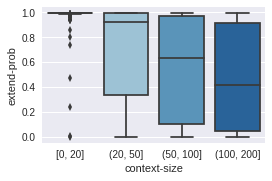

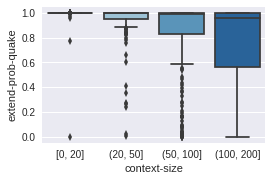

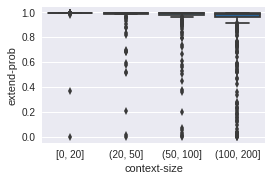

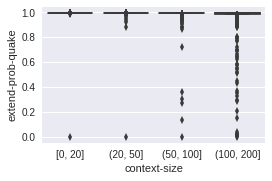

In [33]:
%matplotlib inline
import seaborn as sns
def plot_box_df(mydf, pdfname='defaultname', scale='linear', what='both', plot_mfe=False, plot_quake=False, ranges=[0,25,50,200]):
    
    if what == 'both':
        fig = plt.figure(figsize=(10, 10))
        subplot_num = 210
    else:
        fig = plt.figure(figsize=(4, 2.5))
        subplot_num = 110 #(len(ranges)-1)*100 + 10
    
    suffix = ""
    if plot_mfe:
        suffix += "-mfe"
    else:
        suffix += "-prob"
    
    if plot_quake:
        suffix += "-quake"

    # if scale == 'linear':
    #    ax.set_ylim([min(-20,  min(mydf[nameY])),max(30, max(mydf[nameY]))])
    # import math
    #     yrange = round(mydf[nameY].median()/10) * 10
    #     print "{} median: {}".format(nameY, mydf[nameY].median())
    #     ax.set_ylim([yrange-100, yrange+100])#[mydf[nameY].median() - 10 ,mydf[nameY].median() + 10])
    color_pallete = ['b', "#e41a1c","#386cb0","#1b9e77","#984ea3", "#ff7f00","#ffff33","#a65628","#f781bf"]
    if plot_quake:
        pdfname += "-Quake"
    else:
        pdfname += "-Turner"
    
    if plot_quake:
        extend_color = color_pallete[0]    
    else:
        extend_color = color_pallete[0]
    if what == 'both' or what=='split':
        subplot_num+=1
        ax = fig.add_subplot()
#         sns.boxplot(mydf['context-length'], mydf['split'+suffix],ax=ax)
        
        mydf['context-size']= pd.cut(mydf['context-length'], ranges, include_lowest=True).astype(str)
        order = sorted(set(mydf['context-size'])-set(['nan']), reverse=False, key=lambda t: (int(re.findall('\d+', t)[0])))
        print order
        sns.boxplot( data=mydf, ax=ax, x= 'context-size', y='split'+suffix,  order=order, orient='v', palette='Blues')
        
#         plot_scatter(mydf['context-length'], mydf['split'+suffix], 'context-length', (suffix.split("-"))[1], 
#                  [str(v) for v in list(mydf.index.values)], fig, ax, 
#                  color='y', scale=scale)
#         patch = mpatches.Patch(label='Extend-' + pdfname)
#         ax.legend(handles=[patch], loc='best', shadow=False)

    if what == 'both' or what=='extend':
        subplot_num+=1
        ax = fig.add_subplot()#subplot_num)
        #vals = mydf['extend'+suffix][(ranges[ir]<mydf['context-length']) & (mydf['context-length'] <=ranges[ir+1])]
        mydf['context-size']= pd.cut(mydf['context-length'], ranges, include_lowest=True).astype(str)
        order = sorted(set(mydf['context-size'])-set(['nan']), reverse=False, key=lambda t: (int(re.findall('\d+', t)[0])))
        print order
        sns.boxplot( data=mydf, ax=ax, x= 'context-size', y='extend'+suffix,  order=order, orient='v', palette='Blues')
#         ax.set_xlim([0,1])

#         plot_scatter(mydf['context-length'], mydf['extend'+suffix], 'context-length', (suffix.split("-"))[1],
#                      [str(v) for v in list(mydf.index.values)], fig, ax, 
#                      color=extend_color, scale=scale)
        #patch = mpatches.Patch(label='Extend-' + pdfname)
        #ax.legend(handles=[patch], loc='best', shadow=False)


#     fig.suptitle(pdfname+"-"+what, y =0.96)
    pdfname = 'boxplot-' + pdfname
    fig.savefig (pdfname+"-"+what+".svg", dpi=300, bbox_inches='tight')
    print "Plot saved to: ", pdfname+"-"+what+".svg"
# plot_box_df(df_trna_both, 'tRNA',what='extend', plot_quake=True)

plot_box_df(df_trna_both, 'tRNA',what='extend', ranges=[0,20,50,100, 200])
plot_box_df(df_trna_both, 'tRNA',what='extend', plot_quake=True, ranges=[0,20,50,100,200])

plot_box_df(df_trna_both_codon, 'tRNA-codon',what='extend', ranges=[0,20,50,100, 200])
plot_box_df(df_trna_both_codon, 'tRNA-codon',what='extend', plot_quake=True, ranges=[0,20,50,100,200])


['[0, 20]', '(20, 50]', '(50, 100]', '(100, 200]']
Plot saved to:  boxplot-tRNA-Turner-split.svg
['[0, 20]', '(20, 50]', '(50, 100]', '(100, 200]']
Plot saved to:  boxplot-tRNA-Quake-split.svg
['[0, 20]', '(20, 50]', '(50, 100]', '(100, 200]']
Plot saved to:  boxplot-tRNA-codon-Turner-split.svg
['[0, 20]', '(20, 50]', '(50, 100]', '(100, 200]']
Plot saved to:  boxplot-tRNA-codon-Quake-split.svg


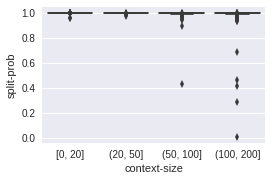

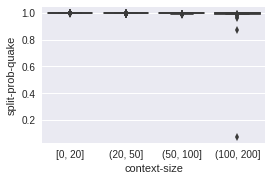

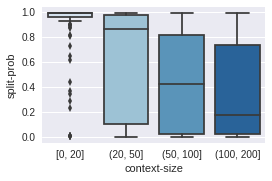

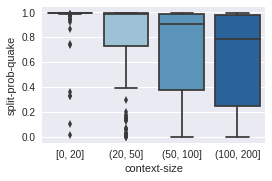

In [36]:
plot_box_df(df_trna_both, 'tRNA',what='split', ranges=[0,20,50,100, 200])
plot_box_df(df_trna_both, 'tRNA',what='split', plot_quake=True, ranges=[0,20,50,100,200])
plot_box_df(df_trna_both_codon, 'tRNA-codon',what='split', ranges=[0,20,50,100, 200])
plot_box_df(df_trna_both_codon, 'tRNA-codon',what='split', plot_quake=True, ranges=[0,20,50,100,200])


In [109]:
df_trna_both.head()

,context-length,extend-prob,split-prob,extend-mfe,split-mfe,extend-prob-quake,split-prob-quake,extend-mfe-quake,split-mfe-quake,context-size
0,0,0.000000,0.994732,0.0,1.0,0.000000,0.997637,0.0,1.0,"[0, 20]"
1,0,0.000000,0.994732,0.0,1.0,0.000000,0.997637,0.0,1.0,"[0, 20]"
2,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0,"[0, 20]"
3,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0,"[0, 20]"
4,0,0.994732,0.994732,1.0,1.0,0.997637,0.997637,1.0,1.0,"[0, 20]"


Plot saved to:  tRNA-Quake-extend.svg
Plot saved to:  tRNA-Turner-extend.svg


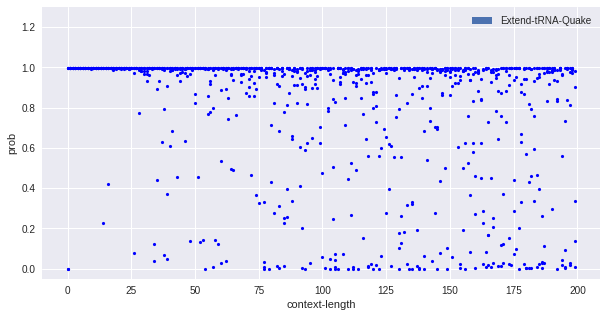

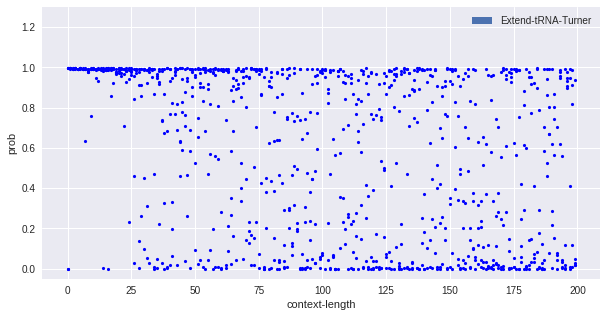

In [110]:
%matplotlib inline
# stem="CAUUGUAUUUGUAAUGCGGUG"
# stem2="GCCUUUUAAAAGGC"
# df_stem = my_eval(stem, context_trna2, 3, 17, 7, 10)
# df_stemtest = my_eval(stem2, context_trna2, 3, 10, 8, 50)

# plot_scatter_df(df_stemtest, 'stem',what='both')
# plot_scatter_df(df_stem, 'stem-Log-', scale='log', what='split')
# plot_scatter_df(df_stem, 'stem',what='extend')
# plot_scatter_df(df_stem, 'stem-Log-', scale='log', what='extend')

# plot_scatter_df(df_trna_both, 'tRNA',what='extend', plot_mfe=True, plot_quake=True)
# plot_scatter_df(df_trna_both, 'tRNA',what='extend', plot_mfe=True, plot_quake=False)


# plot_scatter_df(df_trna_arc_b, 'tRNA arc-b')
# plot_scatter_df(df_trna_arc_b, 'tRNA arc-b Log(p(i,j))', scale='log')
plot_scatter_df(df_trna_both, 'tRNA',what='extend', plot_quake=True)
plot_scatter_df(df_trna_both, 'tRNA',what='extend')

# plot_scatter_df(df_trna_both, 'tRNA-Log', scale='log', what='extend', plot_quake=True)
# plot_scatter_df(df_trna_both, 'tRNA-Log', scale='log', what='extend')

# plot_scatter_df(df_trna, 'tRNA',what='extend')
# plot_scatter_df(df_trna, 'tRNA-Log-', scale='log', what='extend')


# my_plot(trna_lengths, trna_inners, trna_outers )

Plot saved to:  tRNA-Quake-both.svg
Plot saved to:  tRNA-Turner-both.svg
Plot saved to:  tRNA-quake-Quake-both.svg
Plot saved to:  tRNA-Turner-both.svg


/home/milad/miniconda2/envs/mmfold/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'DejaVu Sans Display'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Plot saved to:  tRNA-Log-quake-Quake-extend.svg
Plot saved to:  tRNA-Log--Turner-extend.svg


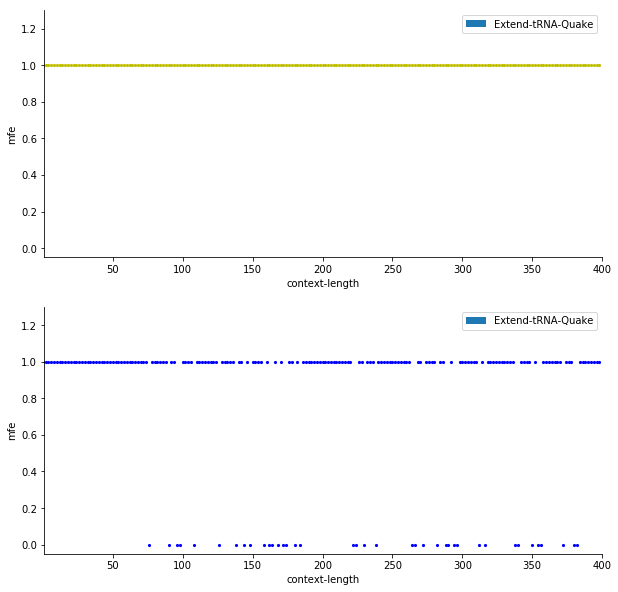

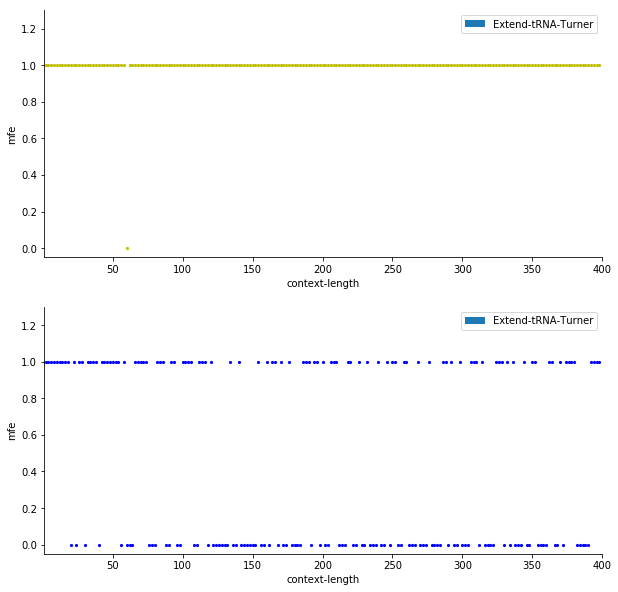

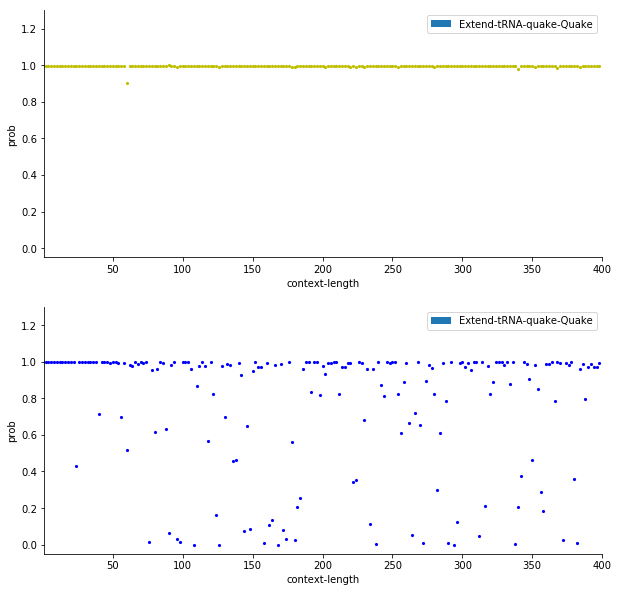

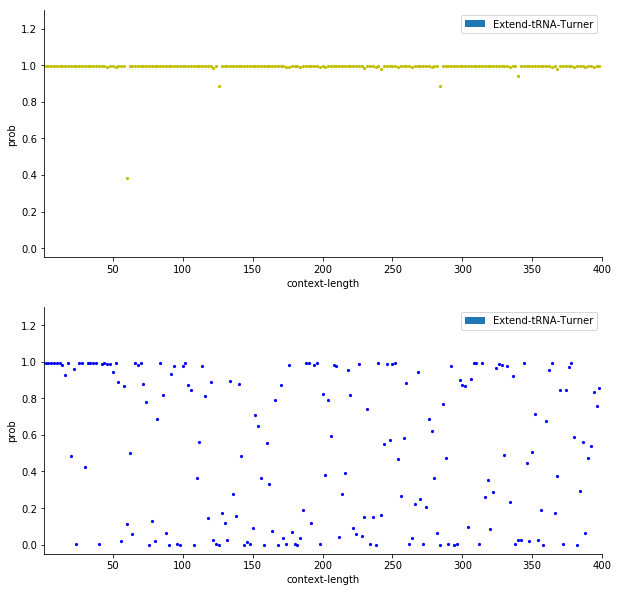

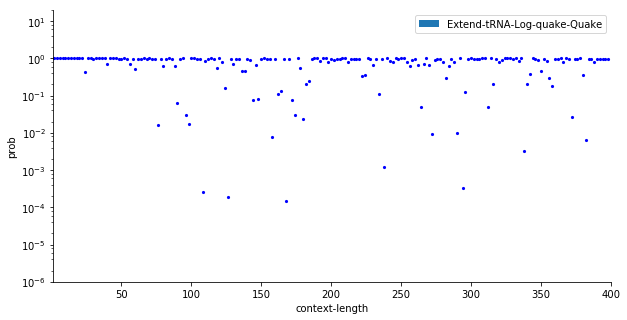

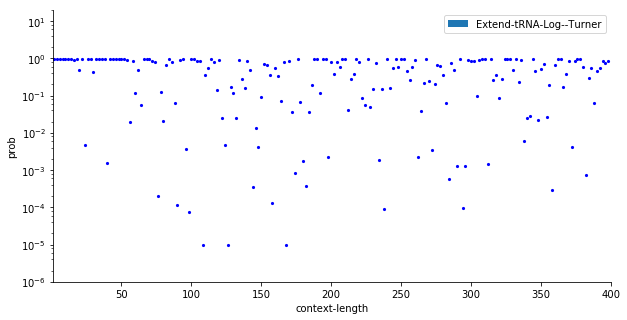

In [7]:
# df_trnaa = my_eval(trna2, context_trna2, 2, 68, 34, 2)
# df_trna_quake = my_eval(trna2, context_trna2, 3, 67, 34, 5, use_pywrapper=False, use_quake=True) 
# df_trna = my_eval(trna2, context_trna2, 3, 67, 34, 5, use_pywrapper=False, use_quake=False) 
# df_trna_both = my_eval(trna2, context_trna2, 3, 67, 34, 2, use_pywrapper=False, quake_opts=[False, True]) 

# stem="CAUUGUAUUUGUAAUGCGGUG"
# stem2="GCCUUUUAAAAGGC"
# df_stem = my_eval(stem, context_trna2, 3, 17, 7, 10)
# df_stemtest = my_eval(stem2, context_trna2, 3, 10, 8, 50)
# plot_scatter_df(df_stemtest, 'stem',what='both')
# plot_scatter_df(df_stem, 'stem-Log-', scale='log', what='split')
# plot_scatter_df(df_stem, 'stem',what='extend')
# plot_scatter_df(df_stem, 'stem-Log-', scale='log', what='extend')
plot_scatter_df(df_trna_both, 'tRNA',what='both', plot_mfe=True, plot_quake=True)
plot_scatter_df(df_trna_both, 'tRNA',what='both', plot_mfe=True, plot_quake=False)


# plot_scatter_df(df_trna_arc_b, 'tRNA arc-b')
# plot_scatter_df(df_trna_arc_b, 'tRNA arc-b Log(p(i,j))', scale='log')
plot_scatter_df(df_trna_both, 'tRNA-quake',what='both', plot_quake=True)
plot_scatter_df(df_trna_both, 'tRNA',what='both')

plot_scatter_df(df_trna_both, 'tRNA-Log-quake', scale='log', what='extend', plot_quake=True)
plot_scatter_df(df_trna_both, 'tRNA-Log-', scale='log', what='extend')

# plot_scatter_df(df_trna, 'tRNA',what='extend')
# plot_scatter_df(df_trna, 'tRNA-Log-', scale='log', what='extend')


# my_plot(trna_lengths, trna_inners, trna_outers )

In [14]:
# df_trna_both_lovely = df_trna_both.copy()
df_trna_both_lovely


NameError: name 'df_trna_both_lovely' is not defined

[1, 3]


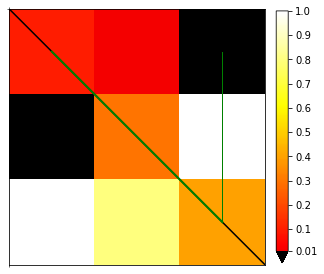

In [77]:
%matplotlib inline
# mpld3.enable_notebook()

mynp = np.array([[0.1,0.01,0.001],[0.00,0.3,1.0],[1.0,0.8,.4]])
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
# my_heatmap(mynp, fig, ax)
my_heatmap(mynp, fig, ax, inverse=False, interactive=False, gene_loc=[1,3])


UAGUAAAAAUUGUGUUUCAGUAAAAUAAUUUCCCCAUUUAUUUUAUCCGGUAAGAGCUUGGGUUUAUUUAAUUGUAGCUAAUUAAUAAAUUAAAACUAAUGCCUUUUUAGCUCAGUGGUAGAGCAUUGUAUUUGUAAUGCGGUGGUCGUCGGUUCGAAUCCGACAAAAGGCUCCUAACAAAGUUGUAGUCAAAUUUUCAUAUUUUUAAAAGAUACCUAAUAU
72 150 100
[100, 172]


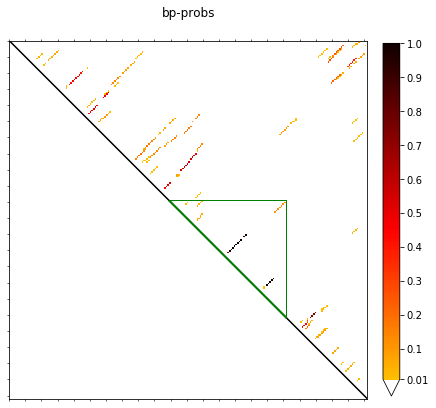

In [94]:
# RNA.get_pr(l_pos+1, r_pos+1)
# context_histone_shuffled = dinuclShuffle(context_histone.upper())
context_trna_shuffled = dinuclShuffle(context_trna.upper())

# my_heatmaps(histone, context_histone_shuffled,context_len = 150, filename='histone-shuffled-150', 
#            what='all')
my_heatmaps(trna, context_trna_shuffled, insert_pos=100, context_len=150, filename='trna-shuffled-150',
           what ='basepairs')
# my_heatmaps(trna2, context_trna2_shuffled, context_len=0, filename='trna-shuffled-0')



[139, 210]
[139, 210]


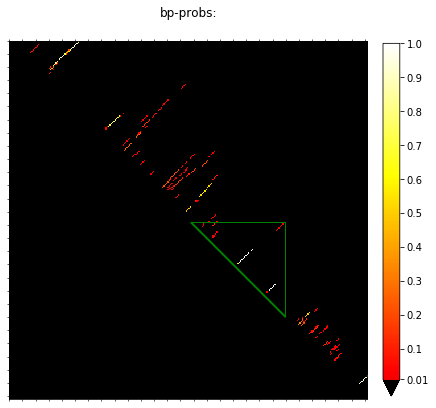

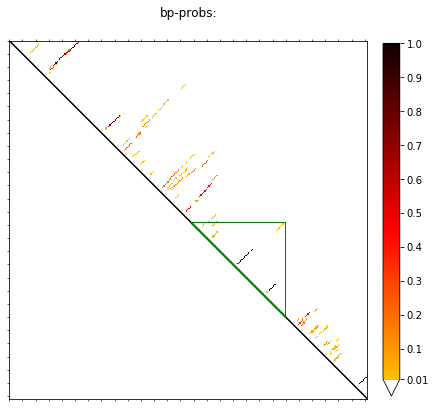

In [18]:
plot_dp_ps('../sample_trna2_nonsymmetric_mm_dp.filt.ps', gene_loc=[139, 210])
plot_dp_ps('../sample_trna2_nonsymmetric_mm_dp.filt.ps', gene_loc=[139, 210], inverse=True)

[139, 210]
[139, 210]


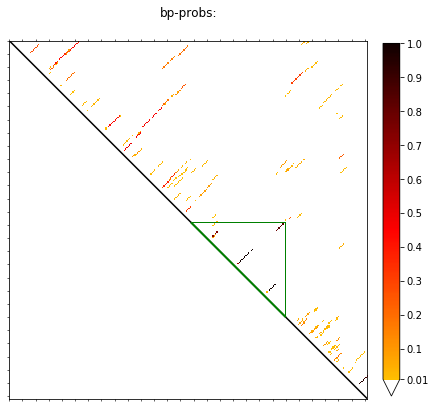

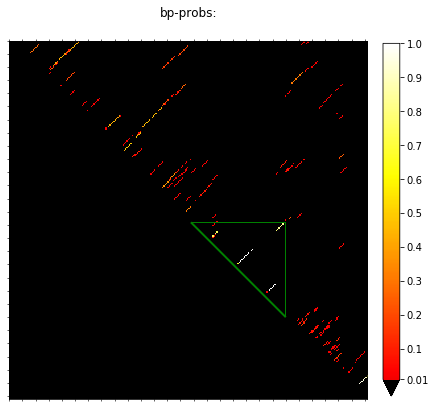

In [19]:
plot_dp_ps('../sample_trna2_nonsymmetric_dp_quake.ps', gene_loc=[139, 210], inverse=True)
plot_dp_ps('../sample_trna2_nonsymmetric_dp_quake.ps', gene_loc=[139, 210], inverse=False)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[139, 210]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[139, 210]


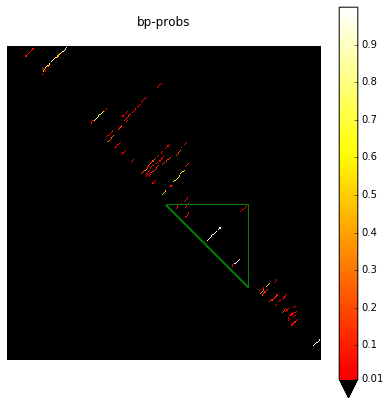

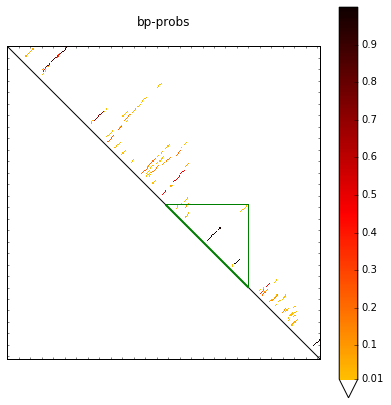

In [175]:
plot_dp_ps('../sample_trna2_nonsymmetric_mm_dp.filt.ps', gene_loc=[139, 210])
plot_dp_ps('../sample_trna2_nonsymmetric_mm_dp.filt.ps', gene_loc=[139, 210], inverse=True)

In [ ]:
# >BX571868.1_244896-246219 CONTEXT 500 Rfam RF00040:245396-245719;	sequence=known_nt;	324;	rne5;	RNase E 5' UTR element;	EMBL desc: Photorhabdus luminescens subsp. laumondii TTO1 complete genome; segment 10/17
context_rne5 = "UAUAAGAUACAAUCGUCUAAUGCAGCGACUUUAUCCAGUUUAGCUGAAACUGGCACUGCUUGCCGUUCUGCAACCCGAACCGGUGG\
AAUUCUGACAACAUCCCCCGCAGACAAUUUAUACUCAGGUUUUAUCCUGCCUUUAUUUAUCCGCACUUCCCCCUUACGCACAAUCCGGUAAAUC\
AUGCUCUUAGGAACACCCUUCAAACGCGCUAAUAAAAAAUUAUCAACUCGCUGUCCAGCUUCAUCGUCAUCAAUAGUGACAAAUUGUACAACUU\
GAUUAUUCGUUUUCAUGAUAGCAAUUUUAAUUAUCACUCAAGCAGAGUGCUACUCAUUUUUAAAUAUGUGUAAAAAUCACGCAUACUUUCCGGU\
UGUUACCUUCGCUACUUUAAGAUAAAGAUUAAAUAUUAACUAUUUCUUCCUAUUUCAUCAGAAAAACCGCUUAAAGACAUAAAGUCACCUUGCU\
AUCACCCCAACAGCAAUGGAAUAAUACGUAGCCACCAUCAGUUUUUUAAUCCUGAAUGGCGAAGUUAAACGUUUGUUCUUCAUUUGAUUGCACA\
AAAACGCAGCAAUGGCGUAAGACGUACUGGGAAAUCAAAUAAUUAGCGGGCUACGGGUAGCAGAUUACUGGAAUCGGAUCAAAUCAGCUUCAUU\
UAUAUUUGCAGAUUAUUCCUAGAAAAGGGUACUGUUUUCUAAGUGAAAAUUCAGACCUGCCGAAAAUAUGCGUCUCUAUACAAACGACAACCGG\
GAGGUUGGCGGAUUUGUAAAAGACACGAGACCAUCGGUUACCAGUCGCUCAUCUAUAUUUGCCCGUAGCUCUAUAACUAAUGUAAAAAAUAAUG\
AGUAAGUUACAAUGAAAAGAAUGCUAAUCAACGCAACUCAGCAAGAAGAGUUGCGUGUUGCUCUGGUUGACGGGCAACGCCUUUAUGAUUUGGA\
UAUCGAAAGCCCAGGACACGAGCAGAAAAAAGCAAAUAUCUACAAAGGUAAAAUCACCCGAAUUGAACCUAGUCUGGAAGCUGCUUUUGUUGAC\
UACGGCGCUGAACGGCAUGGUUUCCUUCCUAUUAAAGAAAUAGCCCGCGAAUAUUUUCCCAAUAACUACCAUCCUCACGGUCGCCCUAAUAUCA\
AAGAUGUUUUAAGGGAGGGCCAGGAAGUUAUCGUUCAAGUCGAUAAAGAAGAACGUGGUAAUAAAGGGGCCGCCUUAACCACUUUUAUCAGUCU\
GGCGGGCAGUUAUCUGGUACUCAUGCCCAAUAACCCUCGCGCAGGCGGUAUUUCCCGCCGUAUCGAAGGAGAUGACCGCACAGAACUGAAAGAA\
GCGUUGGCAUCGUUAG"
print context_rne5
my_heatmaps(context_rne5, None, insert_pos=200, context_len=500, filename='rne5-500',
           what ='all', motif_len=324)

UAUAAGAUACAAUCGUCUAAUGCAGCGACUUUAUCCAGUUUAGCUGAAACUGGCACUGCUUGCCGUUCUGCAACCCGAACCGGUGGAAUUCUGACAACAUCCCCCGCAGACAAUUUAUACUCAGGUUUUAUCCUGCCUUUAUUUAUCCGCACUUCCCCCUUACGCACAAUCCGGUAAAUCAUGCUCUUAGGAACACCCUUCAAACGCGCUAAUAAAAAAUUAUCAACUCGCUGUCCAGCUUCAUCGUCAUCAAUAGUGACAAAUUGUACAACUUGAUUAUUCGUUUUCAUGAUAGCAAUUUUAAUUAUCACUCAAGCAGAGUGCUACUCAUUUUUAAAUAUGUGUAAAAAUCACGCAUACUUUCCGGUUGUUACCUUCGCUACUUUAAGAUAAAGAUUAAAUAUUAACUAUUUCUUCCUAUUUCAUCAGAAAAACCGCUUAAAGACAUAAAGUCACCUUGCUAUCACCCCAACAGCAAUGGAAUAAUACGUAGCCACCAUCAGUUUUUUAAUCCUGAAUGGCGAAGUUAAACGUUUGUUCUUCAUUUGAUUGCACAAAAACGCAGCAAUGGCGUAAGACGUACUGGGAAAUCAAAUAAUUAGCGGGCUACGGGUAGCAGAUUACUGGAAUCGGAUCAAAUCAGCUUCAUUUAUAUUUGCAGAUUAUUCCUAGAAAAGGGUACUGUUUUCUAAGUGAAAAUUCAGACCUGCCGAAAAUAUGCGUCUCUAUACAAACGACAACCGGGAGGUUGGCGGAUUUGUAAAAGACACGAGACCAUCGGUUACCAGUCGCUCAUCUAUAUUUGCCCGUAGCUCUAUAACUAAUGUAAAAAAUAAUGAGUAAGUUACAAUGAAAAGAAUGCUAAUCAACGCAACUCAGCAAGAAGAGUUGCGUGUUGCUCUGGUUGACGGGCAACGCCUUUAUGAUUUGGAUAUCGAAAGCCCAGGACACGAGCAGAAAAAAGCAAAUAUCUACAAAGGUAAAAUCACCCGAAUUGAAC

In [ ]:
shuffle1 = dinuclShuffle(context_trna2.upper())
shuffle2 = dinuclShuffle(context_trna2.upper())
print shuffle1
print
print shuffle2


In [ ]:
# tran2 >X70810.2_30807-30878
trna2="GCCUUUUUAGCUCAGUGGUAGAGCAUUGUAUUUGUAAUGCGGUGGUCGUCGGUUCGAAUCCGACAAAAGGCU"
context_trna2 = "uaugauauuuuuauaguguuuuauucauggaucaauucuauuuuuuauuagcacgugguuuuauuuuguuaaauuguaaa\
uccguauuauuuauaaauugauccuagcucaaaguucaguauuuuuaaauuuuuuuaguuuuaaauaaauauuuuguauaaaaaugugugauuauuu\
aaaagauuucuuccauuucaugacuuuuaauuuuaaaaaaaaauuucaaguauguggccauguauccguauuuggagacaagaagcaagaaaagguu\
uucuuuauaaaaaaguuuagguguuu\
uuauuuuagguaacuuuuuaagcguguuucaccggugcauucaguuuuuuuaguaaugcauaugucauugcaauuuuagcauuauguaaucuuaaa\
agcuuuugucauauuucucaacugcuaugauauauugauaggaguccuucucaauggaugcgggagaauaaauauauuguucacgguagucuaaggc\
ucauugcccccuuuuuaaagucuuagcuuucaucaugcccaggauaaaauaaucaguguugcaauaguucaaauaagcuuaauucaaaguuuauuuuagaggaucgg"
random.seed(1)
np.random.seed(10)

context_trna2_shuffled = dinuclShuffle(context_trna2.upper())
sample_trna2 = context_trna2_shuffled[0:100] + trna2 + context_trna2_shuffled[100:200]
context_trna2_shuffled = dinuclShuffle(context_trna2.upper())
sample_trna2_assymetric = context_trna2_shuffled[0:120] + trna2 + context_trna2_shuffled[120:200]

print ">sample_trna2\n", sample_trna2

In [ ]:
context_histone_shuffled = dinuclShuffle(context_histone.upper())
sample_histone = context_histone_shuffled[0:100] + histone + context_histone_shuffled[100:200]
print ">sample_histone\n", sample_histone

In [ ]:
import pickle
with open('targets-pankoff/'+ 'sample_trna_foldscore_dict' + '.pkl', 'rb') as f:
    sample_trna2_loaded_dict = pickle.load(f)

mpld3.disable_notebook()

plot_dp_ps('./targets-pankoff/cluster_10546_dp.ps')

In [ ]:
sample_np = bpp_dict_to_np_array(sample_trna2_loaded_dict, sample_trna2) 
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
my_heatmap(sample_np, fig, ax)
fig.savefig('foldscore_sample_trna2.pdf')

In [ ]:
# plot_heat_maps(get_mfe_probs(sample_trna2), getBPPM(sample_trna2), 'sample_trna2', 'all')
plot_heat_maps(None, getBPPM(sample_trna2), 'sample_trna2_bp_probs', 'basepairs', inverse=True, interactive=True)
# plot_heat_maps(None, getBPPM(sample_trna2), 'sample_trna2_bp_probs_inverse', 'basepairs', inverse=False)
# plot_heat_maps(None, getBPPM(sample_trna2_assymetric), 'sample_trna2_bp_probs_asymmetric', 'basepairs', inverse=True)
# plot_heat_maps(None, getBPPM(sample_trna2_assymetric), 'sample_trna2_bp_probs_inverse_asymmetric', 'basepairs', inverse=False)
# plot_heat_maps(None, getBPPM(trna2), 'X70810.2_heatmap', 'basepairs', inverse=True, interactive=True)

In [ ]:
struct = ""
t = RNA.fold_compound("GCCGAAAGGC")#, struct)
print t.mfe()
t.__class__
# RNA.fold_compound.
# RNA.fold_compound.mfe(t)
# RNA.fold_compound.type()
# print t

import RNA
print RNA.__path__
structure = ""
# print RNA.pf_fold("AAGGGAAACCCAGGCGGCGC", structure)
# VRNA_VC_TYPE_SINGLE
RNA.Lfold("AAGGGAAACCCAGGCGGCGC")